In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv("../data/train_data_preprocessed.csv")

In [32]:
X = data.drop(['smoking'], axis = 1)
y = data['smoking']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{name} Model")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("-" * 50)

Decision Tree Model
Accuracy: 0.701725181598063
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     22677
           1       0.65      0.64      0.65     16971

    accuracy                           0.70     39648
   macro avg       0.70      0.69      0.69     39648
weighted avg       0.70      0.70      0.70     39648

--------------------------------------------------
SVM Model
Accuracy: 0.7663438256658596
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78     22677
           1       0.69      0.81      0.75     16971

    accuracy                           0.77     39648
   macro avg       0.77      0.77      0.77     39648
weighted avg       0.78      0.77      0.77     39648

--------------------------------------------------
Logistic Regression Model
Accuracy: 0.7486884584342212
Classification Report:
              precision    recall

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(report_rf)
print("-" * 50)

Random Forest Model
Accuracy: 0.7806698950766747
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     22677
           1       0.72      0.79      0.75     16971

    accuracy                           0.78     39648
   macro avg       0.78      0.78      0.78     39648
weighted avg       0.78      0.78      0.78     39648

--------------------------------------------------


In [7]:
param_grid = {
    'n_estimators': [100, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [8]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:")
print(best_params)

best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)

accuracy_grid = accuracy_score(y_test, y_pred_grid)
report_grid = classification_report(y_test, y_pred_grid)

print(f"Accuracy with Grid Search: {accuracy_grid}")
print("Classification Report with Grid Search:")
print(report_grid)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\marty\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
144 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marty\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marty\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\marty\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

Best parameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy with Grid Search: 0.7823345439870864
Classification Report with Grid Search:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     22677
           1       0.72      0.80      0.76     16971

    accuracy                           0.78     39648
   macro avg       0.78      0.78      0.78     39648
weighted avg       0.79      0.78      0.78     39648



In [21]:
rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=300)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(report_rf)
print("-" * 50)

Random Forest Model
Accuracy: 0.7823345439870864
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     22677
           1       0.72      0.80      0.76     16971

    accuracy                           0.78     39648
   macro avg       0.78      0.78      0.78     39648
weighted avg       0.79      0.78      0.78     39648

--------------------------------------------------


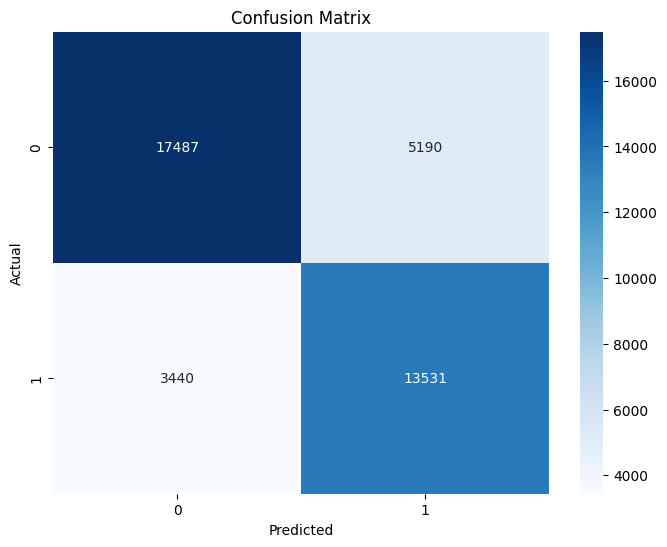

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

selected_features = X.columns[(lasso.coef_ != 0)]

rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=300)
rf.fit(X_train[selected_features], y_train)

y_pred = rf.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest with Selected Features")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Random Forest with Selected Features
Accuracy: 0.7809725585149314
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     22677
           1       0.72      0.79      0.76     16971

    accuracy                           0.78     39648
   macro avg       0.78      0.78      0.78     39648
weighted avg       0.79      0.78      0.78     39648



Lasso doesn't work well.

In [48]:
rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=300)


for n_features in range(11, 22):
    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    selected_features = X.columns[rfe.support_]
    
    rf.fit(X_train[selected_features], y_train)
    
    y_pred = rf.predict(X_test[selected_features])
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    results[n_features] = {
        'features': selected_features,
        'recall': recall
    }

for n_features, result in results.items():
    print(f"Number of features: {n_features}")
    print(f"Selected features: {list(result['features'])}")
    print(f"Recall: {result['recall']:.2f}")
    print("-" * 50)

optimal_n_features = max(results, key=lambda x: results[x]['recall'])
optimal_features = results[optimal_n_features]['features']
optimal_recall = results[optimal_n_features]['recall']

print(f"Optimal number of features: {optimal_n_features}")
print(f"Selected features: {list(optimal_features)}")
print(f"Recall: {optimal_recall:.2f}")